In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [92]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Lectura y limpieza

In [93]:
df = pd.read_csv('spam_ham.csv', sep=';', encoding='latin-1')
df['SMS_TEXT'] = df['SMS_TEXT'].astype(str)

In [94]:
df['Label'] = df['Label'].str.strip('"')

In [95]:
df = df.dropna(subset=['SMS_TEXT'])

# EDA

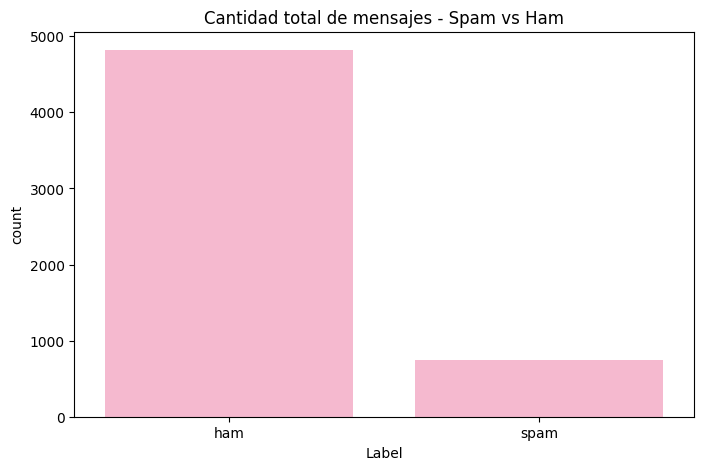

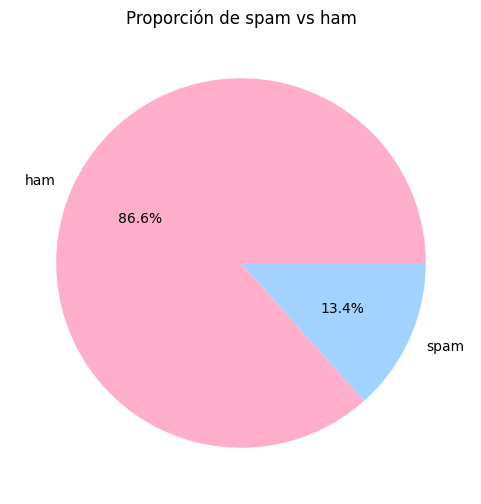

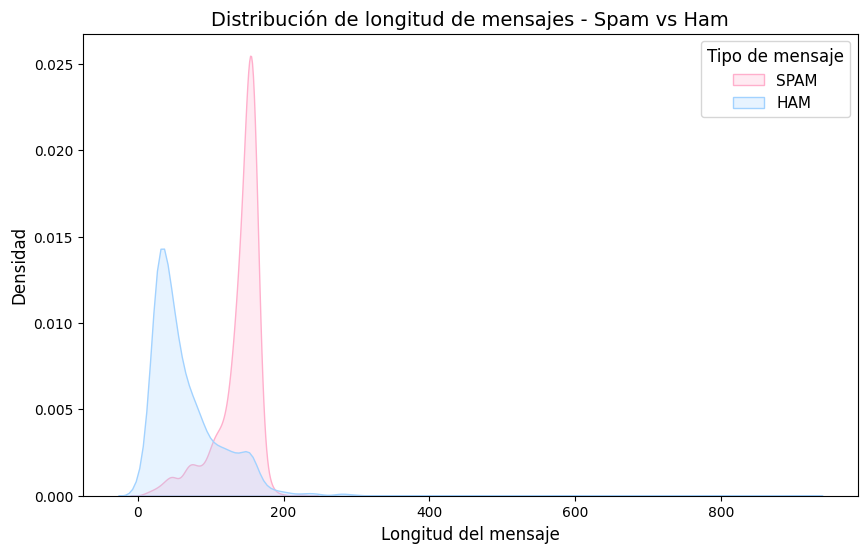

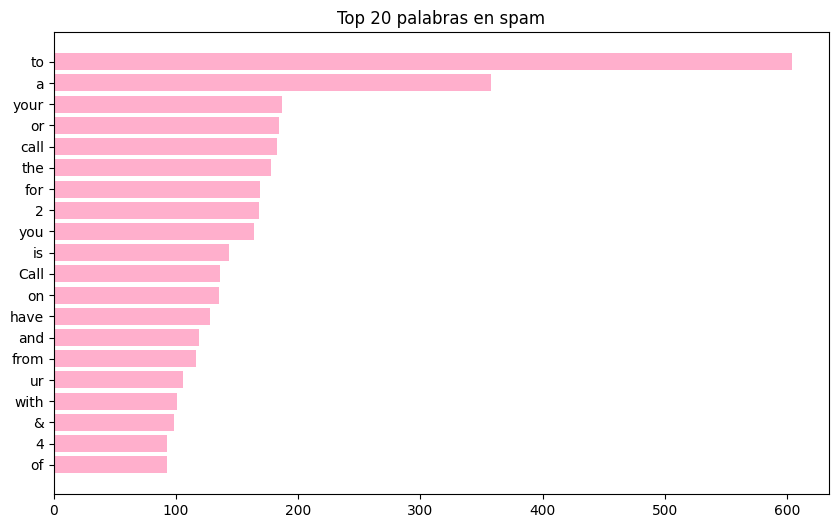

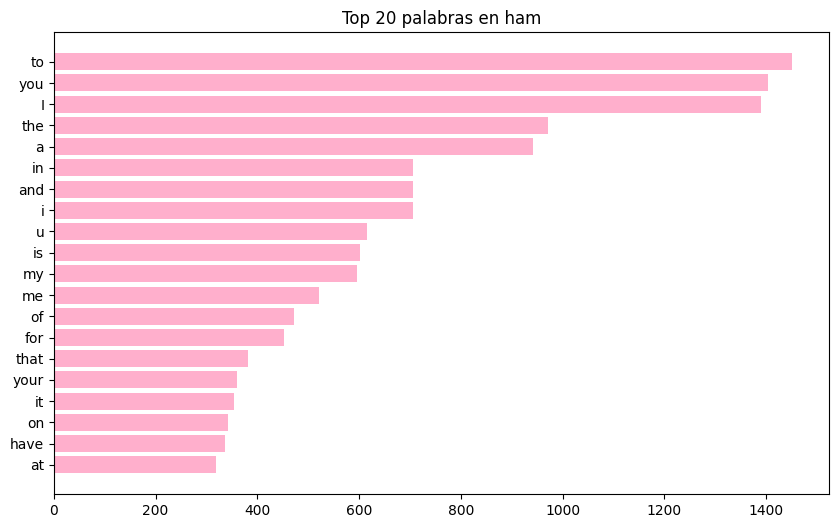

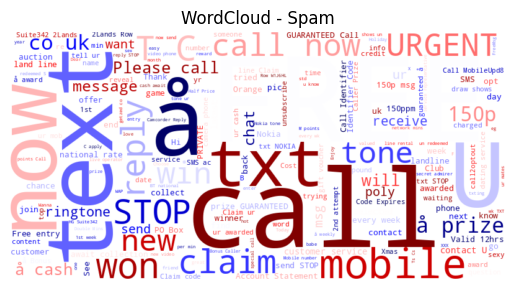

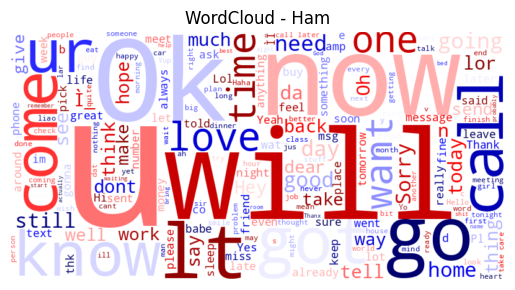

In [96]:
#cantidad total de cada mensaje
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label', color='#ffafcc')
plt.title('Cantidad total de mensajes - Spam vs Ham')
plt.show()

#proporción de spam y ham
plt.figure(figsize=(6, 6))
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors= ["#ffafcc","#a2d2ff"])
plt.title('Proporción de spam vs ham')
plt.ylabel('')
plt.show()

#densidad de longitud de cada mensaje
df['Length'] = df['SMS_TEXT'].apply(len)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Label'] == 'spam'], x='Length', color='#ffafcc', label='SPAM', fill=True)
sns.kdeplot(data=df[df['Label'] == 'ham'], x='Length', color='#a2d2ff', label='HAM', fill=True)
plt.title('Distribución de longitud de mensajes - Spam vs Ham', fontsize=14)
plt.xlabel('Longitud del mensaje', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Tipo de mensaje', title_fontsize=12, fontsize=11)
plt.show()

#20 palabras más frecuentes
def plot_top_words(text_series, title):
    words = ' '.join(text_series).split()
    freq_dist = nltk.FreqDist(words)
    top_words = freq_dist.most_common(20)
    plt.figure(figsize=(10, 6))
    plt.barh([word[0] for word in top_words], [word[1] for word in top_words], color='#ffafcc')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()
plot_top_words(df[df['Label'] == 'spam']['SMS_TEXT'], 'Top 20 palabras en spam')
plot_top_words(df[df['Label'] == 'ham']['SMS_TEXT'], 'Top 20 palabras en ham')

#wordcloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="seismic_r").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
generate_wordcloud(' '.join(df[df['Label'] == 'spam']['SMS_TEXT']), 'WordCloud - Spam')
generate_wordcloud(' '.join(df[df['Label'] == 'ham']['SMS_TEXT']), 'WordCloud - Ham')

In [97]:
def preprocess_text(text):
    tokens = word_tokenize(text) 
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in string.punctuation] 
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)
df['Processed_Text'] = df['SMS_TEXT'].apply(preprocess_text)
df

,Label,SMS_TEXT,Length,Processed_Text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi .. avail bugi n great wo...
1,ham,Ok lar... Joking wif u oni...,29,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor ... u c alreadi say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah n't think goe usf live around though
...,...,...,...,...
5560,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time tri 2 contact u. u å£750 pound prize ...
5561,ham,Will Ì_ b going to esplanade fr home?,37,ì_ b go esplanad fr home
5562,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood ... suggest
5563,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like 'd interest buy someth els ...


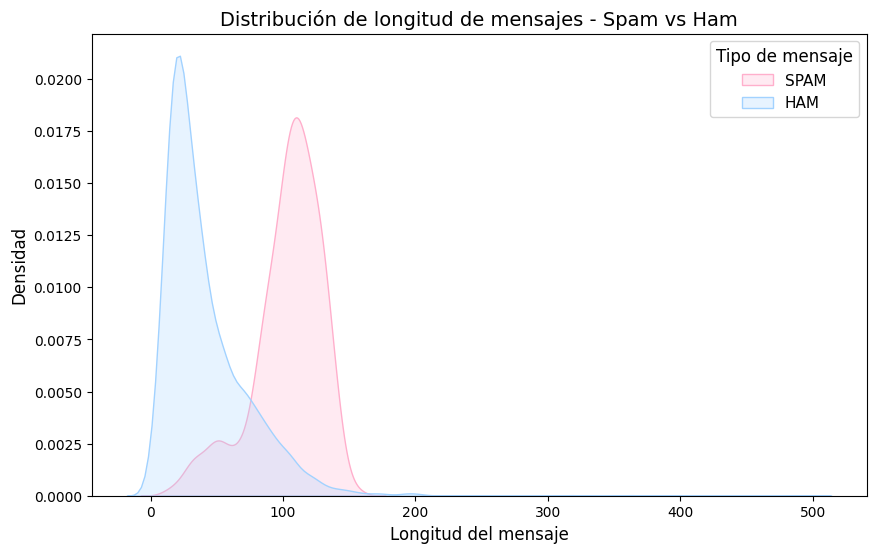

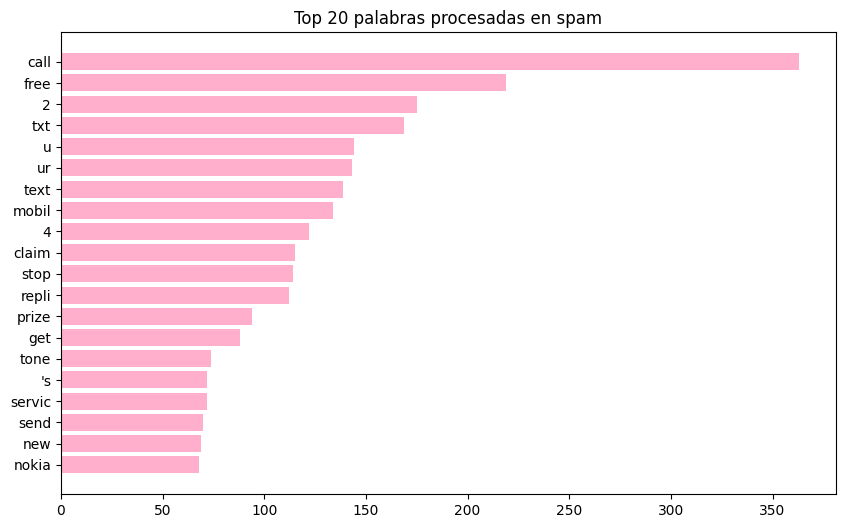

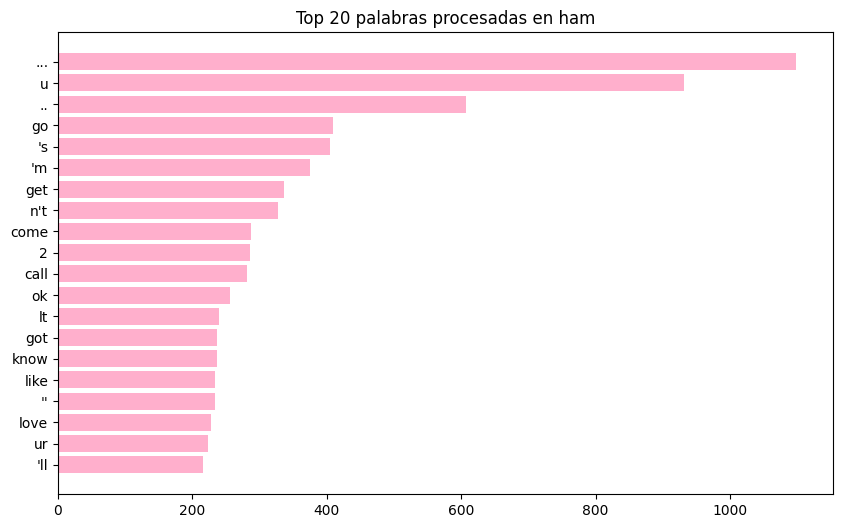

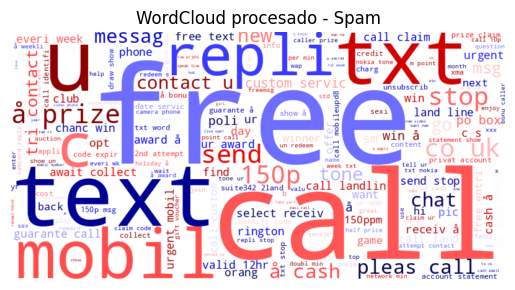

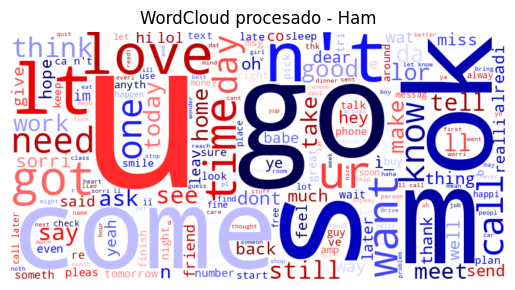

In [98]:
#densidad de longitud de cada mensaje
df['Length'] = df['Processed_Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Label'] == 'spam'], x='Length', color='#ffafcc', label='SPAM', fill=True)
sns.kdeplot(data=df[df['Label'] == 'ham'], x='Length', color='#a2d2ff', label='HAM', fill=True)
plt.title('Distribución de longitud de mensajes - Spam vs Ham', fontsize=14)
plt.xlabel('Longitud del mensaje', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Tipo de mensaje', title_fontsize=12, fontsize=11)
plt.show()

# top 20
plot_top_words(df[df['Label'] == 'spam']['Processed_Text'], 'Top 20 palabras procesadas en spam')
plot_top_words(df[df['Label'] == 'ham']['Processed_Text'], 'Top 20 palabras procesadas en ham')

#wordcloud
generate_wordcloud(' '.join(df[df['Label'] == 'spam']['Processed_Text']), 'WordCloud procesado - Spam')
generate_wordcloud(' '.join(df[df['Label'] == 'ham']['Processed_Text']), 'WordCloud procesado - Ham')

## Modelo bayesiano naive

In [99]:
# entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Label'], test_size=0.2, random_state=42)

In [100]:
#vectorización del texto
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
class SpamClassifier:
    def __init__(self):
        self.p_spam = None
        self.p_ham = None
        self.spam_word_probs = {}
        self.ham_word_probs = {}
    
    def fit(self, X, y):
        self.p_spam = (y == 'spam').sum() / len(y) # P(S)
        self.p_ham = 1 - self.p_spam #P(H)
        
        spam_word_counts = {}
        ham_word_counts = {}
        vocabulary = set()
        
        for text, label in zip(X, y):
            words = text.split()
            for word in words:
                vocabulary.add(word)
                if label == 'spam':
                    spam_word_counts[word] = spam_word_counts.get(word, 0) + 1
                else:
                    ham_word_counts[word] = ham_word_counts.get(word, 0) + 1

        total_spam_words = sum(spam_word_counts.values()) + len(vocabulary)
        total_ham_words = sum(ham_word_counts.values()) + len(vocabulary)
        
        for word in vocabulary:
            self.spam_word_probs[word] = (spam_word_counts.get(word, 0) + 1) / total_spam_words
            self.ham_word_probs[word] = (ham_word_counts.get(word, 0) + 1) / total_ham_words
    
    def predict_probability(self, text):
        words = text.split()
        p_spam = self.p_spam
        p_ham = self.p_ham
        
        for word in words:
            if word in self.spam_word_probs:
                p_spam *= self.spam_word_probs[word] # P(W|S)
                p_ham *= self.ham_word_probs[word] # P(W|H)
        
        # evitar división por cero
        if p_spam + p_ham == 0:
            return 0.0
        
        prob_spam = p_spam / (p_spam + p_ham)

        return prob_spam
    
    def predict(self, text, threshold=0.5):
        prob = self.predict_probability(text)
        return 'spam' if prob >= threshold else 'ham'

In [102]:
# entrenar el modelo
nb_classifier = SpamClassifier()
nb_classifier.fit(X_train, y_train)

# Evaluación del modelo

In [110]:
threshold=0.5

In [ ]:
# evaluación del modelo
y_pred = [nb_classifier.predict(text, threshold) for text in X_test]

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión: {accuracy:.4f}")


Matriz de confusión:
[[952   3]
 [ 13 145]]

Reporte de clasificación:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       955
        spam       0.98      0.92      0.95       158

    accuracy                           0.99      1113
   macro avg       0.98      0.96      0.97      1113
weighted avg       0.99      0.99      0.99      1113


Precisión: 0.9856


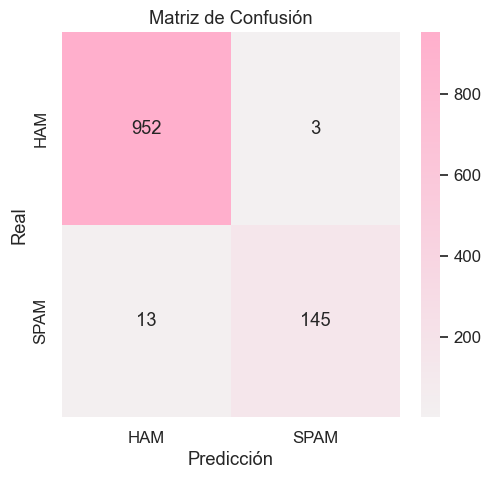


Reporte de Clasificación Completo:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       955
        spam       0.98      0.92      0.95       158

    accuracy                           0.99      1113
   macro avg       0.98      0.96      0.97      1113
weighted avg       0.99      0.99      0.99      1113


Precisión: 0.9856


In [ ]:
y_pred = [nb_classifier.predict(text, threshold) for text in X_test]

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.1)
palette = sns.light_palette("#ffafcc", as_cmap=True)

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap=palette, 
            xticklabels=['HAM', 'SPAM'], 
            yticklabels=['HAM', 'SPAM'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Mostrar reporte completo en consola también
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión: {accuracy:.4f}")

## Para ingresar texto y que el modelo lo clasifique

In [106]:
while True:
    text = input("\nIngrese un mensaje para clasificar (o 'salir' para terminar): ")
    if text.lower() == 'salir':
        break
    print("\n------------------------------------------------------------------------")
    print(f"Message received: {text}")
    
    processed_text = preprocess_text(text)
    prob = nb_classifier.predict_probability(processed_text)
    
    print(f"\nProbabilidad de ser SPAM: {prob:.4f}")
    print(f"Clasificación: {'SPAM' if prob >= 0.5 else 'HAM'}")
    
    # Mostrar las 3 palabras con mayor poder predictivo de SPAM
    words = processed_text.split()
    word_probs = []
    
    for word in words:
        if word in nb_classifier.spam_word_probs:
            spam_prob = nb_classifier.spam_word_probs[word]
            ham_prob = nb_classifier.ham_word_probs[word]
            if ham_prob > 0:  # Evitar división por cero
                ratio = spam_prob / ham_prob
                word_probs.append((word, ratio))
    
    word_probs.sort(key=lambda x: x[1], reverse=True)
    top_words = word_probs[:3]
    
    if top_words:
        print("\nTop 3 palabras con mayor poder predictivo de SPAM:")
        for word, ratio in top_words:
            print(f"- {word} (ratio: {ratio:.2f})")


------------------------------------------------------------------------
Message received: hello my friend, i got you a present

Probabilidad de ser SPAM: 0.0006
Clasificación: HAM

Top 3 palabras con mayor poder predictivo de SPAM:
- friend (ratio: 0.47)
- present (ratio: 0.33)
- hello (ratio: 0.29)
